In [1]:
from algorihtms import value_iteration, policy_iteration
import gym
import pickle
from envs import game2048_env
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sns.set(color_codes=True)

In [2]:
%matplotlib inline

In [3]:
env_name = '2048_2x2'
env = game2048_env.Game2048Env(size=2, computeP=True)
gammas = [0.8, 0.9, 0.95, 0.99]

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [52]:
results = pickle.load(open('backups/'+env_name+'_v.pkl', 'rb'))

In [10]:
results = {}
for gamma in gammas:
    results[gamma] = value_iteration.value_iteration(env, gamma, 1, 800, 1e-20)
pickle.dump(results, open('backups/'+env_name+'_v.pkl', 'wb'))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [11]:
means = {}
stdev = {}
for gamma in gammas:
    results[gamma]["means"] = []
    results[gamma]["stdev"] = []
    results[gamma]["convergence"] = []
    for v in results[gamma]["values"]:
        policy = value_iteration.extract_policy(v, env, gamma)
        scores = value_iteration.evaluate_policy(env, policy, gamma, n=30)
        results[gamma]["means"].append(np.mean(scores))
        results[gamma]["stdev"].append(np.std(scores))
        results[gamma]["convergence"].append(np.sum(np.fabs(v - results[gamma]["values"][-1])))
pickle.dump(results, open('backups/'+env_name+'_v.pkl', 'wb'))

/home/thibaut/usr/vendors/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


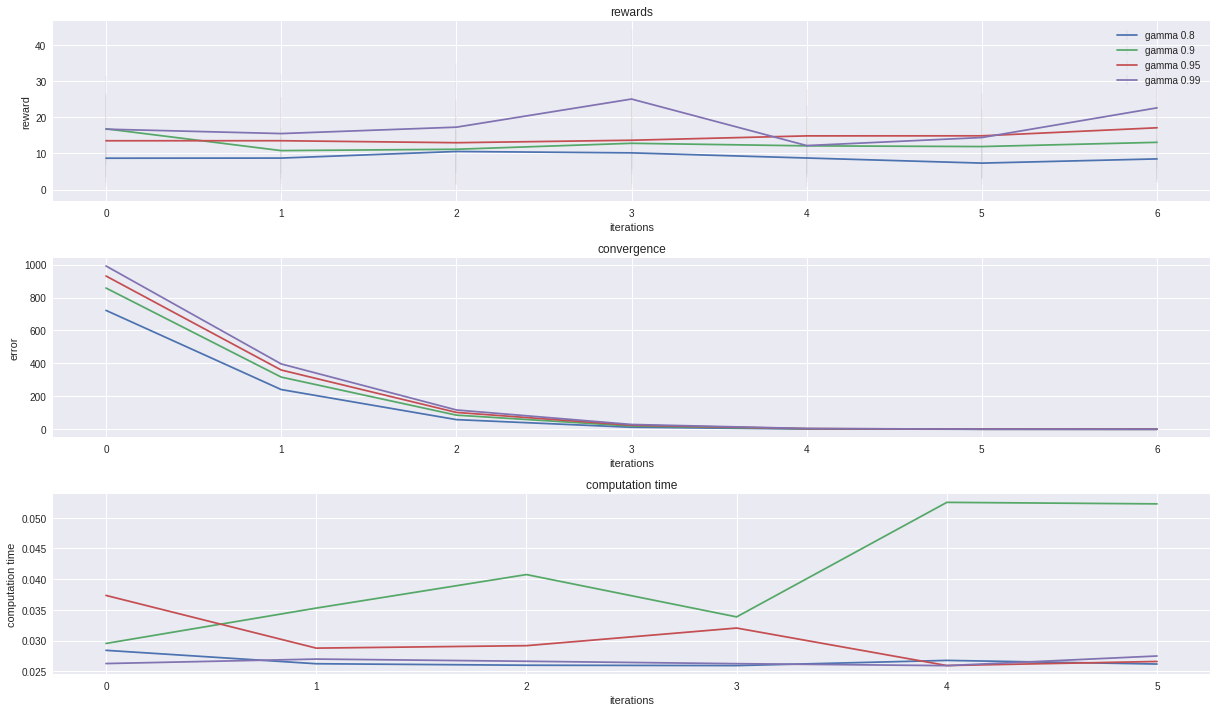

In [50]:
fig, ax = plt.subplots(3)
fig.set_size_inches(10, fig.get_figheight(), forward=True)
fig.set_size_inches(17, fig.get_figwidth(), forward=True)
for gamma in gammas:
    vs = results[gamma]["means"]
    ax[0].errorbar(
        range(len(vs)),
        vs,
        results[gamma]["stdev"], elinewidth=0.1, label="gamma "+str(gamma))
    ax[1].plot(results[gamma]["convergence"])
    ax[2].plot(np.subtract(results[gamma]["computation_time"][1:],
                           results[gamma]["computation_time"][0:-1]))
ax[0].set(xlabel='iterations', ylabel='reward',
       title='rewards')
ax[1].set(xlabel='iterations', ylabel='error',
       title='convergence')
ax[2].set(xlabel='iterations', ylabel='computation time',
       title='computation time')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.tight_layout()
plt.savefig('figs/'+env_name+'.png')
plt.show()

In [28]:
results2 = {}
for gamma in gammas:
    results2[gamma] = policy_iteration.policy_iteration(env, gamma, 1, 800, 1e-15)
pickle.dump(results2, open('backups/'+env_name+'_p.pkl', 'wb'))

Policy-Iteration converged at step 4.


Policy-Iteration converged at step 4.


Policy-Iteration converged at step 4.


Policy-Iteration converged at step 4.


In [29]:
means = {}
stdev = {}
for gamma in gammas:
    results2[gamma]["means"] = []
    results2[gamma]["stdev"] = []
    results2[gamma]["convergence"] = []
    for v in results2[gamma]["policies"]:
        scores = policy_iteration.evaluate_policy(env, v, gamma, n=100)
        results2[gamma]["means"].append(np.mean(scores))
        results2[gamma]["stdev"].append(np.std(scores))
        results2[gamma]["convergence"].append(len(v) - np.sum(v == results2[gamma]["policies"][-1]))
pickle.dump(results2, open('backups/'+env_name+'_p.pkl', 'wb'))

In [53]:
results2 = pickle.load(open('backups/'+env_name+'_p.pkl', 'rb'))

/home/thibaut/usr/vendors/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


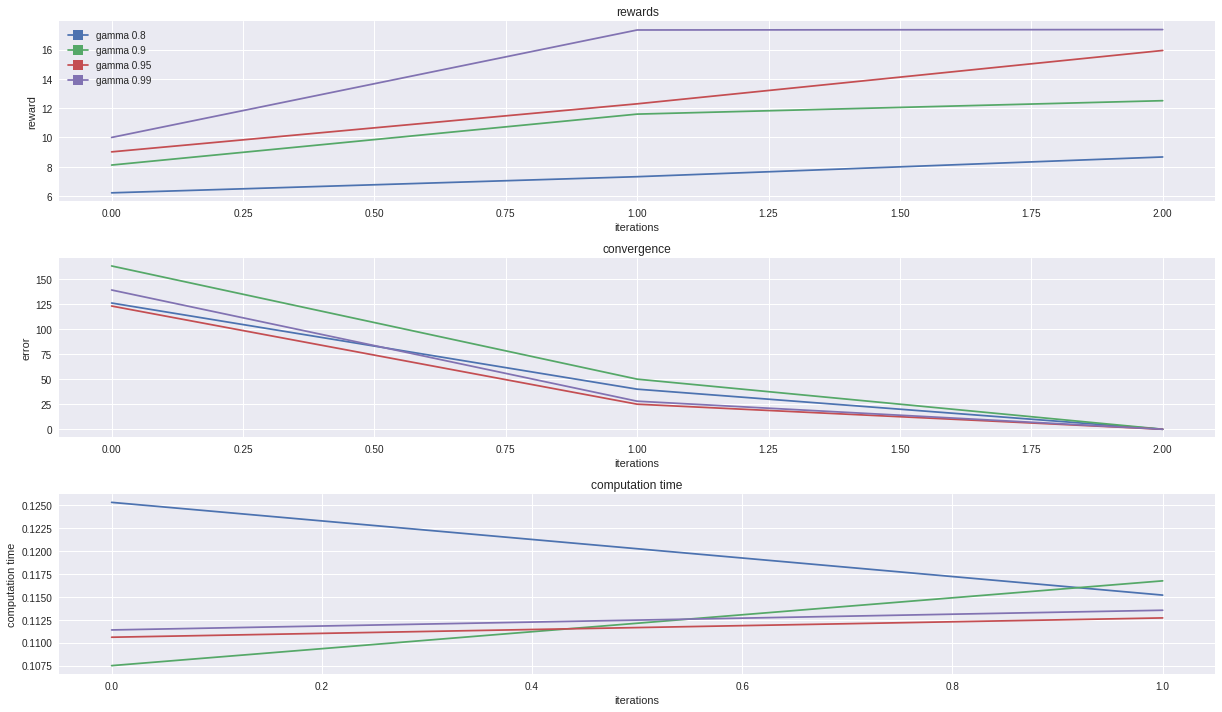

In [38]:
fig, ax = plt.subplots(3)
fig.set_size_inches(10, fig.get_figheight(), forward=True)
fig.set_size_inches(17, fig.get_figwidth(), forward=True)
for gamma in gammas:
    vs = results2[gamma]["means"]
    ax[0].errorbar(
        range(len(vs)),
        vs,
        results2[gamma]["stdev"], elinewidth=1, label="gamma "+str(gamma))
    ax[1].plot(results2[gamma]["convergence"])
    ax[2].plot(np.subtract(results2[gamma]["computation_time"][1:],
                           results2[gamma]["computation_time"][0:-1]))
ax[0].set(xlabel='iterations', ylabel='reward',
       title='rewards')
ax[1].set(xlabel='iterations', ylabel='error',
       title='convergence')
ax[2].set(xlabel='iterations', ylabel='computation time',
       title='computation time')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.tight_layout()
plt.savefig('figs/'+env_name+'_policy.png')
plt.show()

In [55]:
for gamma in gammas:
    print("divergence between policy iteration and value iteration for gamma=", gamma, " : ",
          len(results2[gamma]["policies"][-1]) - np.sum(
              value_iteration.extract_policy(results[gamma]["values"][-1], env, gamma) 
              == results2[gamma]["policies"][-1]
          ))

divergence between policy iteration and value iteration for gamma= 0.8  :  0
divergence between policy iteration and value iteration for gamma= 0.9  :  0
divergence between policy iteration and value iteration for gamma= 0.95  :  0
divergence between policy iteration and value iteration for gamma= 0.99  :  0
